In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

In [8]:
data = pd.DataFrame({
    'headline': [
        "Apple stock jumps after earnings beat expectations",
        "Amazon shares drop due to weak outlook",
        "Google announces breakthrough in quantum computing",
        "Investors worry about inflation and interest rates",
        "AI is transforming the financial sector rapidly"
    ]
})

Sentiment Analysis (TextBlob)

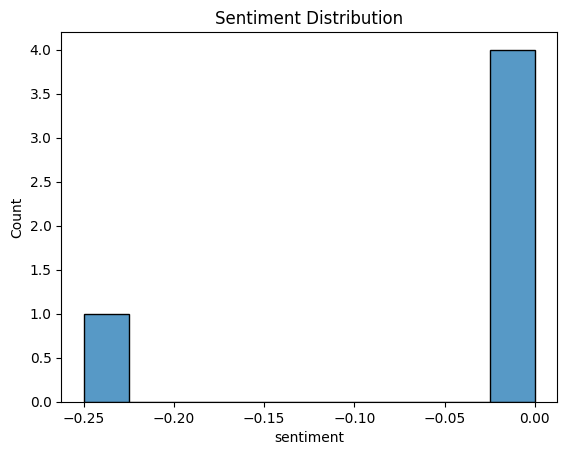

                                            headline  sentiment  \
0  Apple stock jumps after earnings beat expectat...       0.00   
1             Amazon shares drop due to weak outlook      -0.25   
2  Google announces breakthrough in quantum compu...       0.00   
3  Investors worry about inflation and interest r...       0.00   
4    AI is transforming the financial sector rapidly       0.00   

  sentiment_label  
0         Neutral  
1        Negative  
2         Neutral  
3         Neutral  
4         Neutral  


In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['sentiment'] = data['headline'].apply(get_sentiment)

# Visualize sentiment
sns.histplot(data['sentiment'], bins=10)
plt.title('Sentiment Distribution')
plt.show()

# Label sentiment
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
print(data[['headline', 'sentiment', 'sentiment_label']])


Topic Modeling (LDA via Gensim)
